### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Code starts here
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')
df_headings = pd.read_excel('LCDataDictionary.xlsx')







# Code ends here.

In [4]:
df_train

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4
...,...,...,...,...,...,...,...,...,...,...,...
8577,29,152.4878,13,955,4.1,0,3.7,10,3.0,13,8577
8578,19,18.2878,0,119,0.0,5,0.0,17,0.0,6,8578
8579,23,36.5878,6,76,4.2,2,4.5,12,3.4,15,8579
8580,0,12.1878,3,119,4.5,2,5.0,4,4.5,13,8580


In [5]:
df_test

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619
...,...,...,...,...,...,...,...,...,...,...
3674,13,1,75,5.0,5,5.0,21,5.0,2,2144
3675,26,21,494,4.6,0,4.5,38,4.8,10,7242
3676,26,3,85,4.7,2,4.7,34,4.7,18,11631
3677,11,3,28,5.0,2,5.0,13,4.5,6,4639


### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

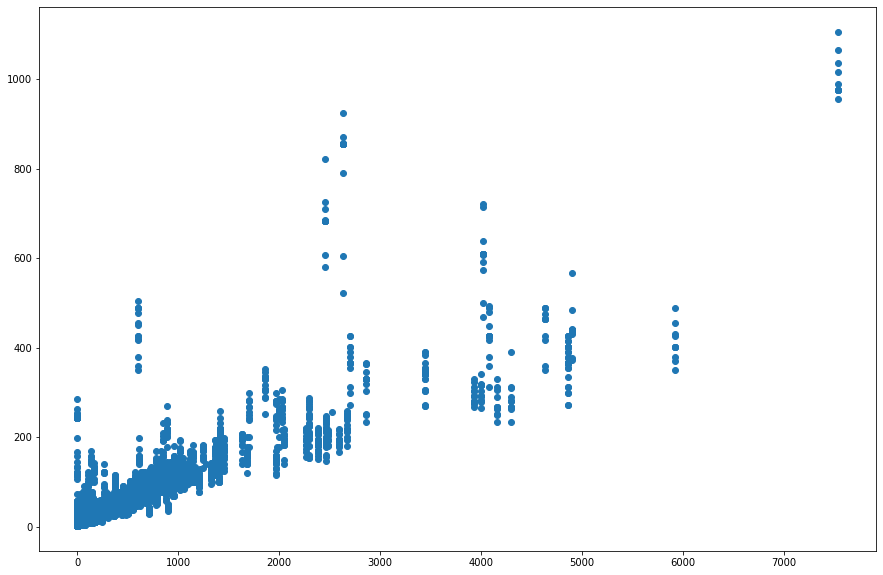

In [6]:
# Code starts here
plt.figure(figsize = [15,10])
plt.scatter(df_train['piece_count'], df_train['list_price'])








#df_train['piece_count'].plot.hist(bins = 30)
# Code ends here.

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [7]:
# Code starts here

X_train = df_train.drop(['list_price'],axis = 1)
y_train = df_train['list_price']


X_test = df_test







# Code ends here.

### Model building

In [8]:
# Code starts here


linreg = LinearRegression()

linreg.fit(X_train, y_train)

y = linreg.predict(X_train)

y_pred = linreg.predict(X_test)


y_pred

# Code ends here.

array([114.66464479,  23.63918098, 148.19831133, ...,  19.81383828,
        24.19699163,  35.13378906])

In [9]:
y_pred.shape

(3679,)

### Residual check!

- Check the distribution of the residual.

0.7718232273650414

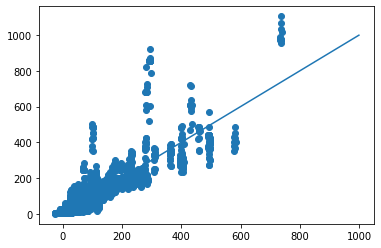

In [10]:
# Code starts here

rsquared = r2_score(y_train, y)


plt.scatter(y, y_train)

xx = np.arange(1000)
yy = np.arange(1000)
plt.plot(xx,yy)


rsquared



# Code ends here.

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [11]:
# Code starts here


df_submission = df_sample_submission.copy()

df_submission['list_price'] = y_pred
df_submission.to_csv('submission.csv',index = False)





# Code ends here.

In [12]:
df_test['Id']

0        9907
1        5243
2        8276
3        6501
4        1619
        ...  
3674     2144
3675     7242
3676    11631
3677     4639
3678     7269
Name: Id, Length: 3679, dtype: int64

In [14]:
# Algorithm starts at x = 5
x_0 = 5

# Learning Rate
rate = 0.001

# Stopping criteria for gradient descent
precision = 0.0001 

# Difference between current x and new x
diff = 1

# Maximum number of iterations
max_iters = 10000

# Number of iterations we performed
iters = 0

# Lambda function for calculating gradient
df = lambda x: 4*(x)**3 - (20*x)

'''Loop till difference between previous and new x-value is greater than precision
    and the number of iterations performed is less than the maximum number of iterations'''

while diff > precision and iters < max_iters:
    # Old x-value
    prev_x = x_0
    # New x-value 
    x_0 = x_0 - rate*df(prev_x)
    # Absolute difference between old and new x-values
    diff = abs(x_0 - prev_x)
    # Increment number of iterations performed by 1
    iters += 1
    print("Iteration {}: x = {}".format(iters, x_0))

print('='*50)

print("Global minima is at x = {}".format(x_0))

Iteration 1: x = 4.6
Iteration 2: x = 4.302656
Iteration 3: x = 4.070091442641317
Iteration 4: x = 3.881798522227242
Iteration 5: x = 3.7254651459654995
Iteration 6: x = 3.59315017642123
Iteration 7: x = 3.479452438850614
Iteration 8: x = 3.3805442813221878
Iteration 9: x = 3.293622649881958
Iteration 10: x = 3.216578885474962
Iteration 11: x = 3.147790676907211
Iteration 12: x = 3.0859858700832468
Iteration 13: x = 3.0301504020310306
Iteration 14: x = 2.979464331337066
Iteration 15: x = 2.9332563231273467
Iteration 16: x = 2.8909705861267936
Iteration 17: x = 2.852142411987139
Iteration 18: x = 2.816379782315585
Iteration 19: x = 2.7833493356748145
Iteration 20: x = 2.752765519933938
Iteration 21: x = 2.7243821069266914
Iteration 22: x = 2.697985482988605
Iteration 23: x = 2.673389291141003
Iteration 24: x = 2.650430113743793
Iteration 25: x = 2.62896396445023
Iteration 26: x = 2.6088634157196666
Iteration 27: x = 2.5900152298893233
Iteration 28: x = 2.572318392516454
Iteration 29: x 